In [8]:
# The C2QA pacakge is currently not published to PyPI. 
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

# Calculate Wigner Function for Maximum Likelihood Estimation of circuit simulation

If a simulation gathers the individual statevectors for each simulated shot, this functionality will calculate the Wigner function for the maximum likehood estimation of the simatulation results. Alternatively, a user could supply their own set of state vector results (separate from QisKit results).

In [9]:
import c2qa
import qiskit

In [10]:
def build_circuit(dist = 2, num_qumodes = 1, num_qubits_per_qumode = 4):
    qmr = c2qa.QumodeRegister(num_qumodes=num_qumodes, num_qubits_per_qumode=num_qubits_per_qumode)
    qr = qiskit.QuantumRegister(size=1)
    cr = qiskit.ClassicalRegister(size=1)
    circuit = c2qa.CVCircuit(qmr, qr, cr)

    circuit.initialize([1,0], qr[0])
    circuit.cv_initialize(0, qmr[0])

    circuit.h(qr[0])
    circuit.cv_c_d(dist, qmr[0], qr[0])
    circuit.h(qr[0])

    return circuit

## Non-MLE Plot

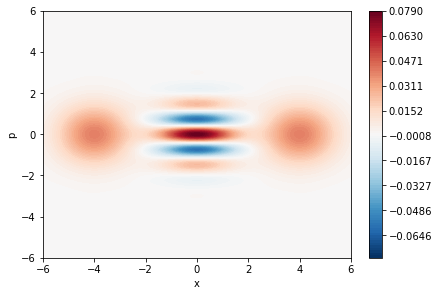

In [11]:
circuit = build_circuit()
state, result = c2qa.util.simulate(circuit)
wigner = c2qa.util.wigner(state, circuit.cutoff)
c2qa.wigner.plot(wigner)

## MLE Plot 

/Users/eleanorcrane/opt/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/eleanorcrane/opt/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


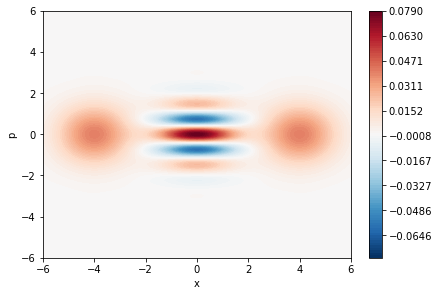

In [5]:
circuit = build_circuit()
states, result = c2qa.util.simulate(circuit, per_shot_state_vector=True)
wigner = c2qa.util.wigner_mle(states, circuit.cutoff)
c2qa.wigner.plot(wigner)